<a href="https://colab.research.google.com/github/devan1510/machine-learning-projects/blob/main/Heart_Image_Classification_and_Chamber_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1
**Image Classification**

# Experiment 1
Classification between heart and non-heart images using Vanilla Neural Network(trained on the original images) and Support Vector Machine Classifier(traained on the HOG Features)

In [ ]:
# import the required libraries
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array

# Walk through data_coursework directory and list number of files and images
for dirpath, dirnames, filenames in os.walk("C:\\advance_data_science_coursework\\data_cw"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'C:\advance_data_science_coursework\data_cw'.
There are 2 directories and 0 images in 'C:\advance_data_science_coursework\data_cw\heart'.
There are 0 directories and 80 images in 'C:\advance_data_science_coursework\data_cw\heart\closed'.
There are 0 directories and 138 images in 'C:\advance_data_science_coursework\data_cw\heart\open'.
There are 0 directories and 925 images in 'C:\advance_data_science_coursework\data_cw\non-heart'.


In [ ]:
#  get the classnames for heart and non-heart images
data_dir = pathlib.Path("C:\\advance_data_science_coursework\\data_cw\\")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['heart' 'non-heart']


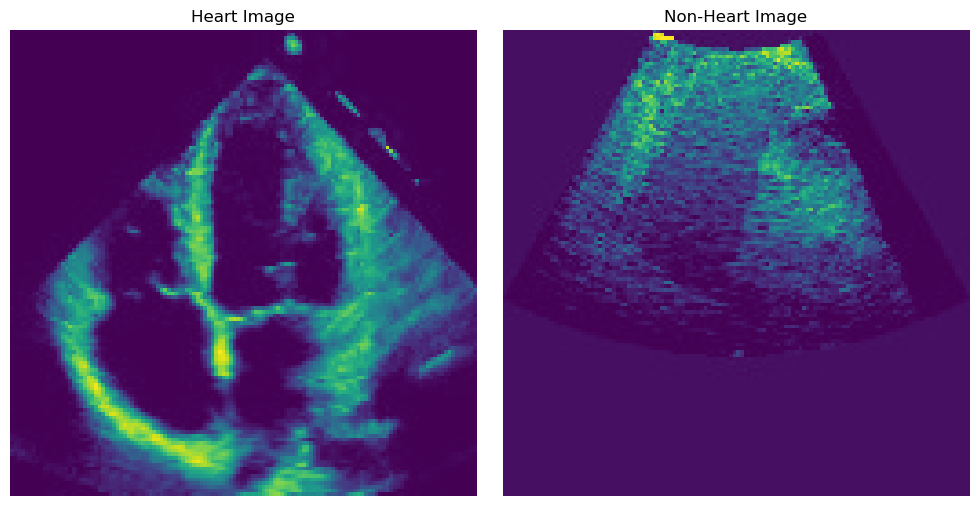

In [ ]:
# load the images from the folders in the local system and visualise them
heart_folder = r'C:\advance_data_science_coursework\data_cw\heart\closed'
nonheart_folder = r'C:\advance_data_science_coursework\data_cw\non-heart'

# Get the first image file from each folder
heart_image_path = os.path.join(heart_folder, os.listdir(heart_folder)[0])
nonheart_image_path = os.path.join(nonheart_folder, os.listdir(nonheart_folder)[0])

# Load the images
heart_img = mpimg.imread(heart_image_path)
nonheart_img = mpimg.imread(nonheart_image_path)

# visualise sample images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(heart_img)
plt.title("Heart Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(nonheart_img)
plt.title("Non-Heart Image")
plt.axis('off')

plt.tight_layout()
plt.show()



In [ ]:
# install cv2 for preprocessing images
!pip install opencv-python

In [ ]:

import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the folder paths
folder_heart = r'C:\advance_data_science_coursework\data_cw\heart'
folder_non_heart = r'C:\advance_data_science_coursework\data_cw\non-heart'

# Function to load images and assign labels
def load_images_and_labels(folder_path, label):
    '''
    Load the heart and non-heart images from their respective folders, convert to numerical tensors,
    and append them to a list with their corresponding labels.
    '''
    images = []
    labels = []

    for dirpath, dirnames, filenames in os.walk(folder_path):
        for file in filenames:
            if file.lower().endswith('.jpg'):  # You can add more extensions if needed (e.g., .png)
                img_path = os.path.join(dirpath, file)
                img = load_img(img_path, target_size=(224, 224))  # Resize for consistent input shape
                img_array = img_to_array(img)
                images.append(img_array)
                labels.append(label)

    return images, labels


In [ ]:
# Load images and labels
heart_images, heart_labels = load_images_and_labels(folder_heart, 1)  # Label 1 for heart
non_heart_images, non_heart_labels = load_images_and_labels(folder_non_heart, 0)  # Label 0 for non-heart

# Combine the data and labels
images = heart_images + non_heart_images
labels = heart_labels + non_heart_labels

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Perform stratified train-test split (75/25)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, stratify = labels)# use the stratify parameter

# Vanilla Convolution Neural Network:
convolution neural network is a type of deep learning arhitecture specifically used while performing computer vision tasks. CNN helps us to make interpretations off of the tensors formed using the pixel values of an image. CNN also act as a base layers for most of the state of the art models for computer vision

In [ ]:
# building a vanilla convolutional neural network model
import tensorflow as tf
cnn_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(8, 3, activation='relu', input_shape=(224, 224, 3)),# set the input shape of the input tensor
  tf.keras.layers.MaxPooling2D(pool_size=2),
  tf.keras.layers.Conv2D(8, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(), # flatten the resultant tensors into a single array
  tf.keras.layers.Dense(1, activation='sigmoid') # sigmoid activation for binary classification
])

# compile the model
cnn_model.compile(loss= tf.keras.losses.binary_crossentropy, # set the loss function
                optimizer=tf.keras.optimizers.Adam(),# set the corresponding optimizer
                metrics=['accuracy']) # set the metric to evaluate the results on

In [ ]:
# Fit the vanilla convolutional network model
cnn_model_history = cnn_model.fit(X_train,y_train,epochs = 5)


Epoch 1/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.8598 - loss: 1.5158
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 1.0000 - loss: 0.0000e+00


In [ ]:
# print the model summary
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 8)    │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 23328)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        23,329 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,413 (282.87 KB)

 Trainable params: 24,137 (94.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 48,276 (188.58 KB)

In [ ]:
# evaluate the cnn model performance
cnn_model_loss,cnn_model_accuracy = cnn_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 1.0000 - loss: 0.0000e+00


In [ ]:
# make predictions based of the model
cnn_predictions = cnn_model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


In [ ]:
# print the accuracy and loss of the cnn model
print(f'The accuracy attained after 5 epochs is {cnn_model_accuracy:.2f} and loss is {cnn_model_loss:.2f} on the test dataset.')

The accuracy attained after 5 epochs is 1.00 and loss is 0.00 on the test dataset.


# Extract the Histogram of Oriented Gradients (HOG) features and train a Support Vector Machine model on those features classify heart and non heart images:

Support Vector Machine is a supervised machine learning algorithm which performs the classification tasks by forming decision boundaries using a low dimensional hyperplane to distinguish between two or more classses.

In [ ]:
# import the required libraries
import os
import cv2
import warnings
from skimage import feature
import numpy as np

warnings.simplefilter('ignore')
# Define a HOG class to extract HOG features from the images
class HOG:
    def __init__(self, orientations=9, pixelsPerCell=(8, 8),
                 cellsPerBlock=(2, 2), transform=False):
        self.orientations = orientations
        self.pixelsPerCell = pixelsPerCell
        self.cellsPerBlock = cellsPerBlock
        self.transform = transform

    def describe(self, image):
        # Ensure image size is large enough for HOG algorithm to work
        min_rows = self.pixelsPerCell[0] * self.cellsPerBlock[0]
        min_cols = self.pixelsPerCell[1] * self.cellsPerBlock[1]

        hist = feature.hog(image, orientations=self.orientations,
                           pixels_per_cell=self.pixelsPerCell,
                           cells_per_block=self.cellsPerBlock,
                           transform_sqrt=self.transform)
        return hist
# define a function to load images, extract HOG features, and combine them with an associate label
def process_images_in_folder(folder_path, hog, label):
    """
    Extracts HOG features from all images in the specified folder and its subfolders.
    """
    features_list = []
    for dirpath, dirnames, filenames in os.walk(folder_path):
        for file in filenames:
            if file.lower().endswith('.jpg'):
                image_path = os.path.join(dirpath, file)
                image = cv2.imread(image_path, 0)

                image = cv2.resize(image, (64, 64))
                features = hog.describe(image)
                features_list.append((features, label))

    return features_list

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Set folder paths
heart_folder = r'C:\advance_data_science_coursework\data_cw\heart'
non_heart_folder = r'C:\advance_data_science_coursework\data_cw\non-heart'

# set the parameters to extract the HOG features
hog = HOG(orientations=9, pixelsPerCell=(4, 4), cellsPerBlock=(1, 1), transform=True) # set the HOG parameters

# Process images and extract features (label: 1 == heart,0 == non-heart) using the defined function
heart_features = process_images_in_folder(heart_folder, hog, label=1) # label all the heart images as 1
non_heart_features = process_images_in_folder(non_heart_folder, hog, label=0) # label all the non-heart images as 0

# Combine the heart and non heart features and labels
# meaning create pairs of numerical representation of images with thier corresponding labels
features = np.array([feat[0] for feat in heart_features + non_heart_features])
labels = np.array([feat[1] for feat in heart_features + non_heart_features])

In [ ]:
# perform the 75/25 test-train split of the HOG features and their corresponding labels
svm_X_train,svm_X_test, svm_y_train, svm_y_test = train_test_split(features, labels, test_size=0.25)

# Train SVM classifier
# linear decision boundary (a straight line or a hyperplane) that best separates the data into different classes.
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(svm_X_train, svm_y_train)

# Make predictions on the test set
svm_predictions = svm_classifier.predict(svm_X_test)

In [ ]:
# making comparisons based of Support Vector Machine model and Convolutional Neural Network
# make the decision based on metrics like Precision,accuracy and F1 score
from sklearn.metrics import accuracy_score, precision_score, f1_score
svm_accuracy = accuracy_score(svm_predictions,svm_y_test)
svm_precision = precision_score(svm_predictions,svm_y_test)
svm_f1_score = f1_score(svm_predictions,svm_y_test)

cnn_accuracy = accuracy_score(cnn_predictions,y_test)
cnn_precision = precision_score(cnn_predictions,y_test)
cnn_f1_score = f1_score(cnn_predictions,y_test)

In [ ]:
# print the metrics for both the model
print('classification metrics for the Support Vector Machine Model:')
print(f'the acccuracy for the support vector machine model is {svm_accuracy}')
print(f'the precision for the support vector machine model is {svm_precision}')
print(f'the f1_score for the support vector machine model is {svm_f1_score}')

print('classification metrics for the Support Vector Machine Model:')
print(f'the acccuracy for the convolutional network model is {cnn_accuracy}')
print(f'the precision for the convolutional network model is {cnn_precision}')
print(f'the f1_score for the convolutional network model is {cnn_f1_score}')


classification metrics for the Support Vector Machine Model:
the acccuracy for the support vector machine model is 1.0
the precision for the support vector machine model is 1.0
the f1_score for the support vector machine model is 1.0
classification metrics for the Support Vector Machine Model:
the acccuracy for the convolutional network model is 1.0
the precision for the convolutional network model is 1.0
the f1_score for the convolutional network model is 1.0


# Observations from Experiment 1 so far:
Looking at the classification metrics of the vanilla convolutional neural network(trained on images) and Support Vector Machine
(trained on HOG features with linear decision boundary)is pretty much the same across metrics of accuracy, precision and f1_score.
# now lets perform five fold cross validation to further validate our conclusion.

In [ ]:
# first lets begin with the Vanilla CNN

# import required libraries
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold # perform Five fold cross validation
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

# set up parameters for 5-fold cross-validation
five_fold_validation = KFold(n_splits=5, shuffle=True, random_state=42)

# initialise the fold number
fold_no = 1

# record the classification metrics for the CNN model
cnn_precision_per_fold = []
cnn_recall_per_fold = []
cnn_f1_score_per_fold = []
cnn_accuracy_per_fold = []

# Iterate through folds using a for loop and record the classification metrics and the runtime in a list
for train_idx, val_idx in five_fold_validation.split(images):
    print(f'\nTraining Fold {fold_no}...')

    # Split data into train and validation dataset for each successive fold
    X_train, X_val = images[train_idx], images[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # Train the model on the training data and use the validation data for evaluation
    cnn_history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

    # make the predictions using the convolutional neural network
    cnn_model2_predictions = cnn_model2.predict(X_val)

    # convert the production probabilities into binary format for performance evaluation
    cnn_predictions = [1 if x >= 0.5 else 0 for x in cnn_model2_predictions]

    # Performance Evaluation(calculating metrics like recall,f1_score,precision,confusion,matrix)
    cnn_model_accuracy = round(accuracy_score(y_val,cnn_predictions),2)
    cnn_model_recall = round(recall_score(y_val,cnn_predictions),2)
    cnn_model_f1_score = round(f1_score(y_val,cnn_predictions),2)
    cnn_model_precision = round(precision_score(y_val,cnn_predictions),2)

    # append the results to a list
    cnn_precision_per_fold.append(cnn_model_precision)
    cnn_recall_per_fold.append(cnn_model_recall)
    cnn_f1_score_per_fold.append(cnn_model_precision)
    cnn_accuracy_per_fold.append(cnn_model_accuracy)

    # proceed to the next fold
    fold_no += 1


Training Fold 1...
Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0073
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0083
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0081
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0088
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 0.0196
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0100
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy

In [ ]:
# now lets do the same for the SVM model on the HOG features

# 5-fold cross-validation
five_fold_validation = KFold(n_splits=5, shuffle=True, random_state=42)

# initialise the fold number
fold_no = 1

# record the classification metrics for the CNN model
svm_precision_per_fold = []
svm_recall_per_fold = []
svm_f1_score_per_fold = []
svm_accuracy_per_fold = []

# Iterate through folds using a for loop and record the classification metrics and the runtime in a list
for train_idx, val_idx in five_fold_validation.split(images):
    print(f'\nTraining Fold {fold_no}')

    # Split data into train and validation dataset for each successive fold
    X_train, X_val = svm_X_train[train_idx], svm_X_test[val_idx]
    y_train, y_val = svm_y_train[train_idx], svm_y_test[val_idx]

    # Train the model on the training data
    svm_classifier.fit(X_train, y_train)

    # make the predictions using the support vector machine
    svm_model2_predictions = svm_classifier.predict(X_val)

    # convert the production probabilities into binary format for performance evaluation
    svm_predictions = [1 if x >= 0.5 else 0 for x in svm_model2_predictions]

    # Performance Evaluation(calculating metrics like recall,f1_score,precision,confusion,matrix)
    svm_model_accuracy = round(accuracy_score(y_val,svm_predictions),2)
    svm_model_recall = round(recall_score(y_val,svm_predictions),2)
    svm_model_f1_score = round(f1_score(y_val,svm_predictions),2)
    svm_model_precision = round(precision_score(y_val,svm_predictions),2)

    # append the results to a list
    svm_precision_per_fold.append(svm_model_precision)
    svm_recall_per_fold.append(svm_model_recall)
    svm_f1_score_per_fold.append(svm_model_precision)
    svm_accuracy_per_fold.append(svm_model_accuracy)

    # proceed to the next fold
    fold_no += 1


Training Fold 1

Training Fold 2

Training Fold 3

Training Fold 4

Training Fold 5


In [ ]:
# calculate the average values for accuracy,precision,f1_score,recall for Convoutional Neural Network and the Support Vector Machine
print('Evaluation metrics for the convolutional neural network:')
print(f'Average accuracy per fold: {np.mean(cnn_accuracy_per_fold):.2f}')
print(f'Average precision per fold: {np.mean(cnn_precision_per_fold):.2f}')
print(f'Average recall per fold: {np.mean(cnn_recall_per_fold):.2f}')
print(f'Average f1_score per fold: {np.mean(cnn_f1_score_per_fold):.2f}')
print('Evaluation metrics for the support vector machine:')
print(f'Average accuracy per fold: {np.mean(svm_accuracy_per_fold):.2f}')
print(f'Average precision per fold: {np.mean(svm_precision_per_fold):.2f}')
print(f'Average recall per fold: {np.mean(svm_recall_per_fold):.2f}')
print(f'Average f1_score per fold: {np.mean(svm_f1_score_per_fold):.2f}')

Evaluation metrics for the convolutional neural network:
Average accuracy per fold: 0.56
Average precision per fold: 0.32
Average recall per fold: 0.15
Average f1_score per fold: 0.32
Evaluation metrics for the support vector machine:
Average accuracy per fold: 1.00
Average precision per fold: 1.00
Average recall per fold: 1.00
Average f1_score per fold: 1.00


# conclusions from Experiment 1:
we can conclude from the above mentioned experiment that even though the vanilla convolutional neural network (trained on heart and non heart images) performs about similarly to the Support Vector Machine(trained on the HOG features extracted from the images) across metrics of accuracy,precision,recall and f1_score initially.
But there's a significant discrepancy in the outcome when we run a five fold cross-validation on the convolutional neural network model(trained on images) and Support Vector Machine(trained on HOG features) as the Support Vector Machine works way better than the convolutional model, meaning its able to generalise better to the test data leading to better results across various metrics.

# Experiment 2(Model of Choice = Convolutional Neural Network)

even though in the previous experiment support vector machine trained on the HOG features outperformed the vanilla convolutional neural network trained on the actual images but since we would be working with the "open heart" and "closed heart" images in this experiment I would like to stick with Vanilla Convolution Network for this task.

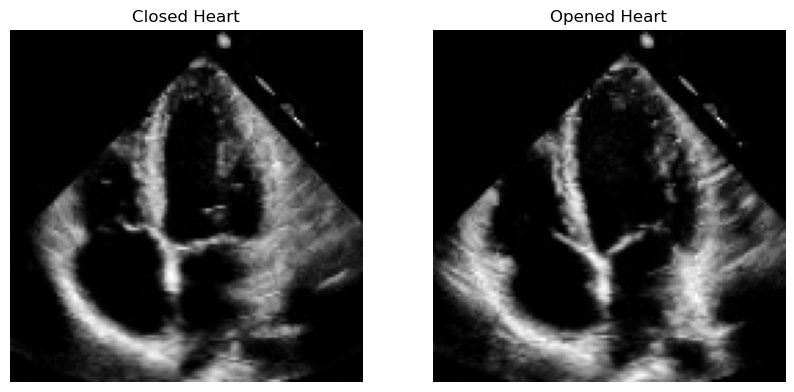

In [ ]:
# display a random image from each class

# import required libraries
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# get the folder for non heart images
closed_heart_folder = r'C:\advance_data_science_coursework\data_cw\heart\closed'

# Get a random image path from non-heart image
closed_heart_image = random.sample(os.listdir(closed_heart_folder), 1)

# Read in the closed image from the image path
closed_heart_image_path = os.path.join(closed_heart_folder, closed_heart_image[0])
closed_heart_image = mpimg.imread(closed_heart_image_path)

# Folder containing heart images
open_heart_folder = r'C:\advance_data_science_coursework\data_cw\heart\open'

# Get a random image path
open_heart_image = random.sample(os.listdir(open_heart_folder), 1)

# Read in the open image from the image path
open_heart_image_path = os.path.join(open_heart_folder, open_heart_image[0])
open_heart_image = mpimg.imread(open_heart_image_path)

# Plot the images side by side
plt.figure(figsize=(10,5))

# Plot Heart Image
plt.subplot(1, 2, 1)
plt.imshow(closed_heart_image, cmap='gray')
plt.title("Closed Heart")
plt.axis("off")

# Plot Non-Heart Image
plt.subplot(1, 2, 2)
plt.imshow(open_heart_image, cmap='gray')
plt.title("Opened Heart")
plt.axis("off")

# Show the plots
plt.show()


# load the images and perform a 75/25 'stratified' test_train_split on the combined dataset

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array

# Define the folder paths
closed_heart = r'C:\advance_data_science_coursework\data_cw\heart\closed'
open_heart = r'C:\advance_data_science_coursework\data_cw\heart\open'

# Function to load images and assign labels
def load_images_and_labels(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith('.jpg'):
            img_path = os.path.join(folder_path, filename)
            img = load_img(img_path, target_size=(224, 224))  # Resize images
            img_array = img_to_array(img)/255.0  # Normalize the image
            images.append(img_array)
            labels.append(label)
    return images, labels

# Load images and labels
closed_heart_images, closed_heart_labels = load_images_and_labels(closed_heart, 1)  # Label 1 for closed heart
open_heart_images, open_heart_labels = load_images_and_labels(open_heart, 0)  # Label 0 for open heart

# Combine the data and labels
images = np.array(closed_heart_images + open_heart_images, dtype=np.float32)
labels = np.array(closed_heart_labels + open_heart_labels, dtype=np.int32)

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, stratify=labels, random_state=42) # set the random seed for replicability

In [ ]:
# build the model Convolutional Neural Model
import tensorflow as tf
# we are going to use the Sequential API to build the model
cnn_model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(8, 3, activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPooling2D(pool_size=2),
  tf.keras.layers.Conv2D(8, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')])# since we are performing classification we are gonna be using the sigmoid activation function at the output layer

# compile the model
cnn_model2.compile(loss= tf.keras.losses.binary_crossentropy,# the loss function
                optimizer=tf.keras.optimizers.Adam(),# the optimizer
                metrics=['accuracy']) # the evaluation metric

# perform five fold cross validation


Training Fold 1...
Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.3638 - loss: 1.2001 - val_accuracy: 0.2955 - val_loss: 0.9069
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.3949 - loss: 0.8003 - val_accuracy: 0.7045 - val_loss: 0.6648
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.5962 - loss: 0.6721 - val_accuracy: 0.7045 - val_loss: 0.6052
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.5968 - loss: 0.6834 - val_accuracy: 0.7045 - val_loss: 0.6065
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.5880 - loss: 0.6808 - val_accuracy: 0.7045 - val_loss: 0.6158
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.6037 - loss: 0.6633 - val_accuracy: 0.7045 - val_loss: 0.6115
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.5846 - loss: 0.6698 - val_accuracy: 0.7045 - val_loss: 0.6104
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.6098 - loss: 0.6529 - val_accuracy

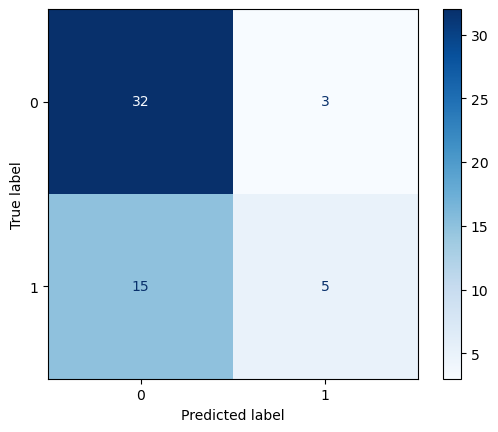

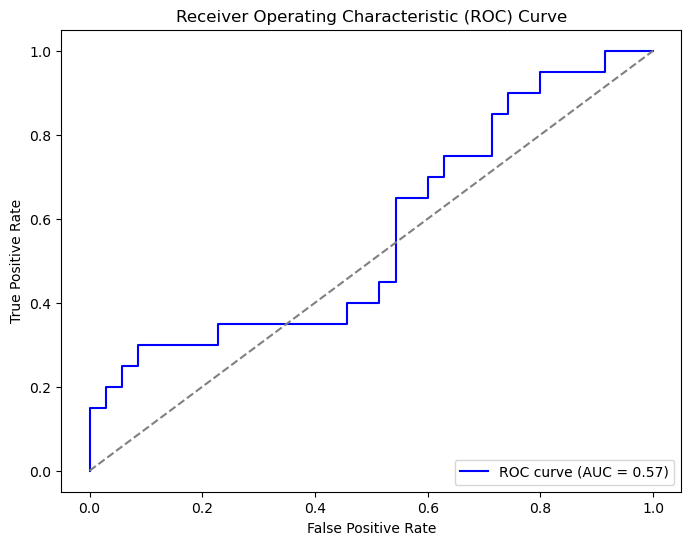


Training Fold 2...
Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.6754 - loss: 0.6007 - val_accuracy: 0.5455 - val_loss: 0.6630
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.6559 - loss: 0.5888 - val_accuracy: 0.5455 - val_loss: 0.6433
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.6562 - loss: 0.5755 - val_accuracy: 0.5455 - val_loss: 0.6420
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.6609 - loss: 0.5540 - val_accuracy: 0.5909 - val_loss: 0.5877
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.7413 - loss: 0.5382 - val_accuracy: 0.6136 - val_loss: 0.5644
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.7438 - loss: 0.5075 - val_accuracy: 0.7045 - val_loss: 0.5322
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.7861 - loss: 0.4821 - val_accuracy: 0.7500 - val_loss: 0.5010
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.7943 - loss: 0.4663 - val_accuracy

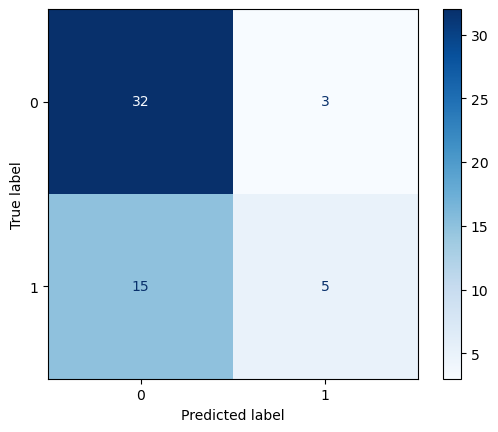

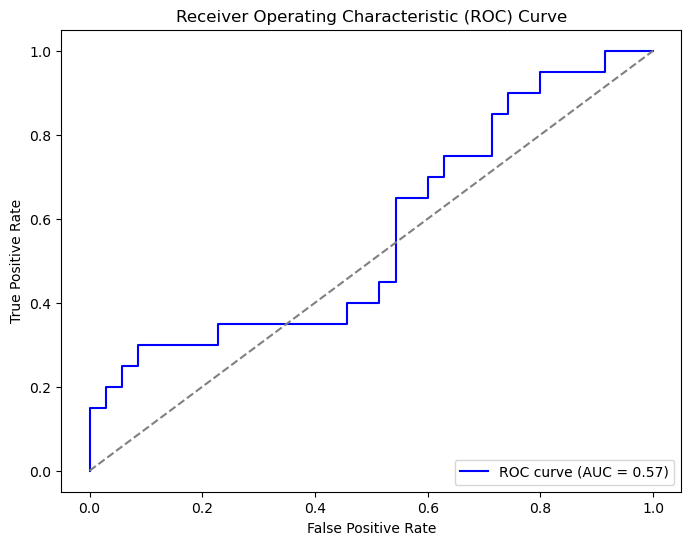


Training Fold 3...
Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.8660 - loss: 0.3485 - val_accuracy: 0.9773 - val_loss: 0.2391
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.9329 - loss: 0.3114 - val_accuracy: 0.9545 - val_loss: 0.2091
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.9115 - loss: 0.3013 - val_accuracy: 1.0000 - val_loss: 0.1745
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.9445 - loss: 0.2474 - val_accuracy: 1.0000 - val_loss: 0.1471
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.9545 - loss: 0.2455 - val_accuracy: 1.0000 - val_loss: 0.1405
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.9555 - loss: 0.2258 - val_accuracy: 1.0000 - val_loss: 0.1053
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.9565 - loss: 0.2057 - val_accuracy: 1.0000 - val_loss: 0.0936
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.9527 - loss: 0.1679 - val_accuracy

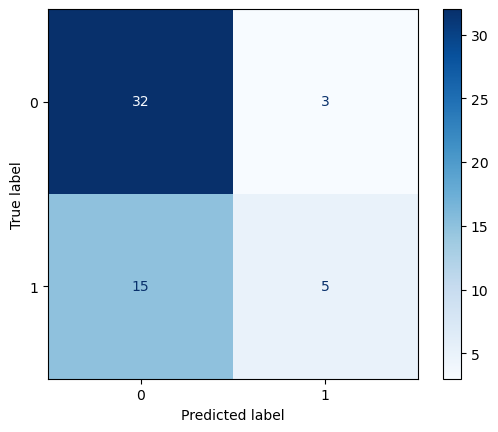

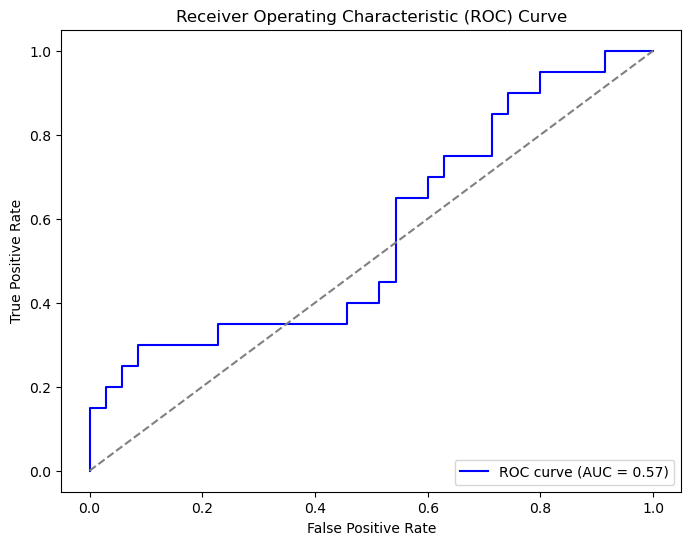


Training Fold 4...
Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.9702 - loss: 0.1267 - val_accuracy: 1.0000 - val_loss: 0.0838
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.9575 - loss: 0.1323 - val_accuracy: 1.0000 - val_loss: 0.0874
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.9778 - loss: 0.1201 - val_accuracy: 1.0000 - val_loss: 0.0637
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.9685 - loss: 0.1077 - val_accuracy: 1.0000 - val_loss: 0.0702
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.9744 - loss: 0.1114 - val_accuracy: 1.0000 - val_loss: 0.0673
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.9500 - loss: 0.1205 - val_accuracy: 1.0000 - val_loss: 0.0583
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.9637 - loss: 0.1054 - val_accuracy: 0.9535 - val_loss: 0.1347
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.9476 - loss: 0.1182 - val_accuracy

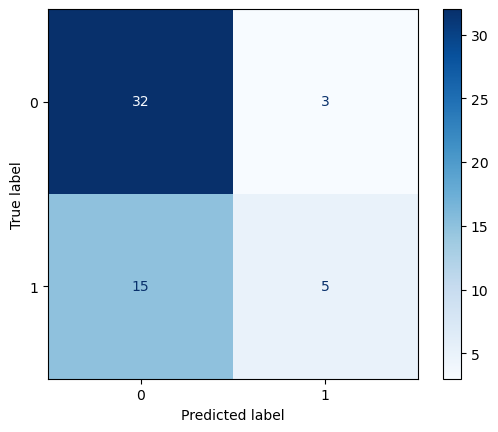

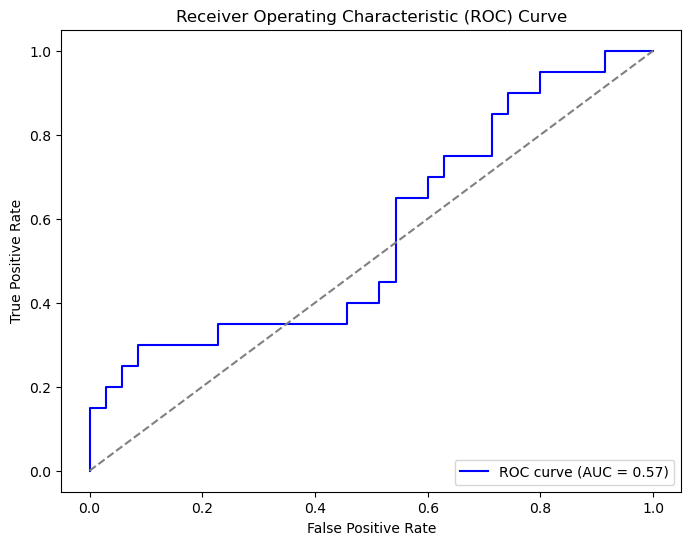


Training Fold 5...
Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.9758 - loss: 0.0796 - val_accuracy: 0.9302 - val_loss: 0.1743
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.9653 - loss: 0.1016 - val_accuracy: 0.9302 - val_loss: 0.1866
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.9887 - loss: 0.0561 - val_accuracy: 0.9535 - val_loss: 0.1715
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.9885 - loss: 0.0515 - val_accuracy: 0.9535 - val_loss: 0.1741
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.9922 - loss: 0.0416 - val_accuracy: 0.9302 - val_loss: 0.1744
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.9828 - loss: 0.0536 - val_accuracy: 0.9535 - val_loss: 0.1745
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.9898 - loss: 0.0442 - val_accuracy: 0.9302 - val_loss: 0.1827
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.9850 - loss: 0.0476 - val_accuracy

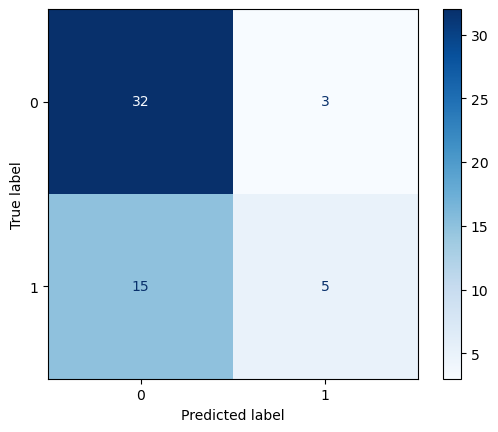

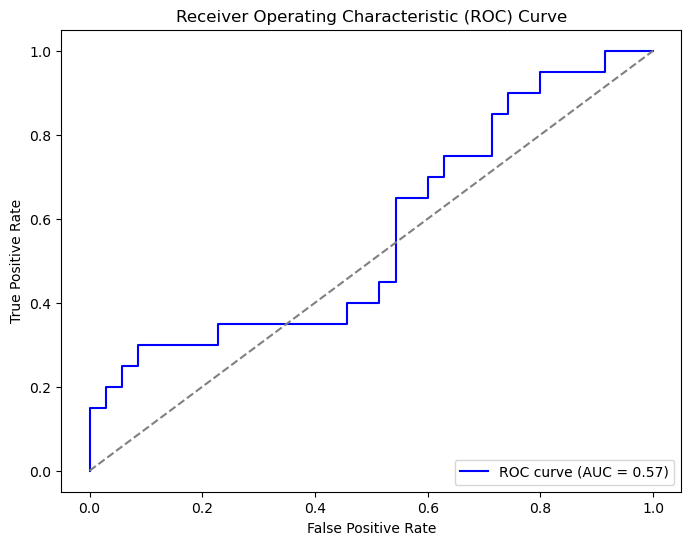

In [ ]:
# import required libraries
import time
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
 from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,roc_curve,auc,ConfusionMatrixDisplay

# Define 5-fold cross-validation
five_fold_validation = KFold(n_splits=5, shuffle=True, random_state=42)

# Store the metrics of each fold
fold_no = 1
runtime_per_fold = []
precision_per_fold = []
recall_per_fold = []
f1_score_per_fold = []

# Iterate through folds using a for loop and record the classification metrics and the runtime in a list
for train_idx, val_idx in five_fold_validation.split(images):
    print(f'\nTraining Fold {fold_no}...')

    # Split data into train and validation dataset for each successive fold
    X_train, X_val = images[train_idx], images[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # record the beginning of the training
    start_time = time.time()

    # Train the model on the training data and use the validation data for evaluation
    history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

    # record the end of the training
    end_time = time.time()

    # record the training duration for each fold of validation append it to the list
    training_time = end_time - start_time
    runtime_per_fold.append(training_time)

    # make the predictions using the convolutional neural network
    cnn_model2_predictions = cnn_model2.predict(X_val)
    # convert the production probabilities into binary format for performance evaluation
    predictions = [1 if x >= 0.5 else 0 for x in cnn_model2_predictions]

    # Performance Evaluation(calculating metrics like recall,f1_score,precision,confusion,matrix)
    cnn_model_recall = round(recall_score(y_val,predictions),2)
    cnn_model_f1_score = round(f1_score(y_val,predictions),2)
    cnn_model_precision = round(precision_score(y_val,predictions),2)
    cnn_confusion_matrix = confusion_matrix(y_val,predictions)
    # append the results to a list
    precision_per_fold.append(cnn_model_precision)
    recall_per_fold.append(cnn_model_recall)
    f1_score_per_fold.append(cnn_model_precision)

    # Display Confusion Matrix
    display_cm = ConfusionMatrixDisplay(confusion_matrix=cnn_confusion_matrix, display_labels=[0, 1])
    display_cm.plot(cmap='Blues')
    plt.show()

    # Plot Receiver Operating Characteristic(ROC) Curve
    false_positive_rate, true_positive_rate, _ = roc_curve(y_test, cnn_model2_predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    # Plot Receiver Operating Characteristic(ROC) Curve
    plt.figure(figsize=(8, 6))
    plt.plot(false_positive_rate, true_positive_rate, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # proceed to next fold
    fold_no += 1




In [ ]:
cnn_model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 8)    │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 23328)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │        23,329 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,413 (282.87 KB)

 Trainable params: 24,137 (94.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 48,276 (188.58 KB)

In [ ]:
# calculate average precision, recall and f1_score, runtime
avg_precision = np.mean(precision_per_fold)
avg_recall = np.mean(recall_per_fold)
avg_f1score = np.mean(f1_score_per_fold)
avg_runtime = np.mean(runtime_per_fold)
print('Stats for the Vanilla Convolutional Network Model for 5-fold Validation')
print(f'Average precision of the model for five fold validation is {avg_precision:.2f}')
print(f'Average recall of the model for five fold validation is {avg_recall:.2f}')
print(f'Average f1_score of the model for five fold validation is {avg_f1score:.2f}')
print(f'Average runtime of the model for five fold validation is {avg_runtime:.2f}')

Stats for the Vanilla Convolutional Network Model for 5-fold Validation
Average precision of the model for five fold validation is 0.62
Average recall of the model for five fold validation is 0.25
Average f1_score of the model for five fold validation is 0.62
Average runtime of the model for five fold validation is 11.34


# observation from Experiment 2:
#we can observe that the vanilla convolutional neural network is not able to classify between open heart and closed heart images which could be comprehended using mean values of metrics across the five folds:
#Precision: 0.62,Recall:0.25,f1_score:0.62

#we can also observe the same using the Receiver Operating Characteristic Curve which gives the value of 0.57
it seems like the vanilla convolutional neural network is too simple and is not able to capture the minute details of the closed and open valves
in the open and closed heart images which results in the model making sort of "random guesses" about the images
#which is observable in the fact that the model makes the same predictions irrespective of the varying inputs across different folds of validation which could be visualised using a confusion matrix.


#We can use robust techniques like transfer learning which is essentially using a pretrained model(trained on a different dataset) and fining tuning  
and training it on the custom dataset and making predictions of the model. It not only helps us attain better results with fewer number of epochs
but is also efficient in working with small datasets. This all positives of using a transfer learing model comes with a higher computation time
which is obvious due to the use of a deeper neural networks with hundreds of millions of parameters.

# Experiment 3
Transfer Learninng: transfer learning is a method using which we can train our dataset on pretrained model make perform various machine learning tasks using the learned weights of that model on a different dataset. Transfer learning models also excel in attaining great accuracy even when working with small datasets but all of the efficiency comes at the cost of higher computation time as we tend to work hundreds of millions of parameters.

Data Augmentation: data augmentation is a technique to intro regularisation in the model to prevent overfitting and have the model learn the general trends and behavior of the dataset this helps us get great results with the validation as well as the test dataset but again it leads to slightly higher computation time since we working with more number of images than usual.

In [ ]:
import os
from PIL import Image
import numpy as np
# load the images
closed_heart_path = r'C:\advance_data_science_coursework\data_cw\heart\closed'
open_heart_path = r'C:\advance_data_science_coursework\data_cw\heart\open'

def load_images_from_folder(folder_path, image_size=(224, 224)):
    images = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(file_path).convert('RGB')
            img = img.resize(image_size)
            images.append(np.array(img))
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
    return np.array(images)

# Load images
closed_images = load_images_from_folder(closed_heart_path)
open_images = load_images_from_folder(open_heart_path)

print(f"Closed heart images: {closed_images.shape}")
print(f"Open heart images: {open_images.shape}")


Closed heart images: (80, 224, 224, 3)
Open heart images: (138, 224, 224, 3)


In [ ]:
# Assign labels
closed_labels = np.zeros(len(closed_images))   # Label 0 for "closed"
open_labels = np.ones(len(open_images))        # Label 1 for "open"

# Combine images and labels
images = np.concatenate((closed_images, open_images), axis=0)
labels = np.concatenate((closed_labels, open_labels), axis=0)

# Perform Data Augmentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..241.6434].


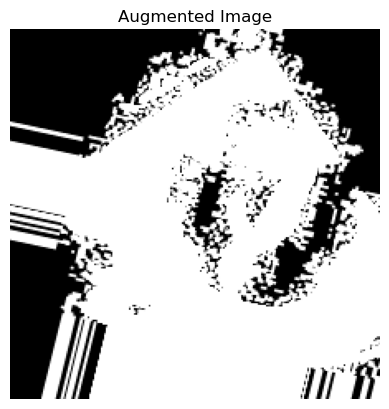

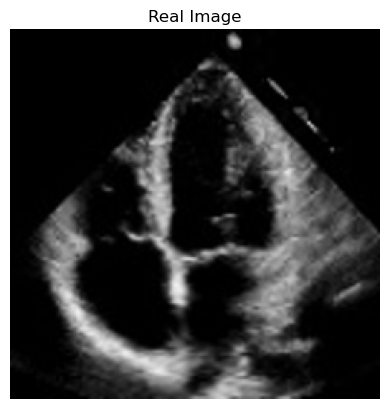

In [ ]:
# visualise the augmented image with the normal image using ImageDataGenerator in Keras API
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagenerator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# fit the datagenerator on the images of open and closed data
datagenerator.fit(images)
# Generate one batch of augmented images
aug_iter = datagenerator.flow(images, batch_size=1)
augmented_image = next(aug_iter)[0]

plt.figure()
plt.imshow(augmented_image)
plt.title("Augmented Image")
plt.axis("off")


plt.figure()
plt.imshow(images[0])
plt.title("Real Image")
plt.axis("off")
plt.show()

In [ ]:
# import the required libraries
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load base model without top classification layer
from tensorflow.keras.applications import EfficientNetV2B0

# --- Base model without top ---
efficient_net_model = EfficientNetV2B0(include_top=False, weights='imagenet', input_shape= (224,224,3))

# Create new model using a functional api
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = efficient_net_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)

# integrate the model with the determined inputs and outputs
transfer_learning_model = tf.keras.Model(inputs, outputs)


In [ ]:
# compiple the model
transfer_learning_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss= tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy'])

# Now use the Data Augmentation(a regularisation technique while working with images) with the transfer learning model(EfficientNetV2B0 Model) also use Five fold validation


Training Fold 1...


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.6220 - loss: 0.6268 - val_accuracy: 0.9091 - val_loss: 0.4284
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.9631 - loss: 0.2033 - val_accuracy: 0.9318 - val_loss: 0.3756
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9550 - loss: 0.1275 - val_accuracy: 0.9545 - val_loss: 0.2235
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9423 - loss: 0.1741 - val_accuracy: 0.9318 - val_loss: 0.1973
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.9471 - loss: 0.1419 - val_accuracy: 0.9318 - val_loss: 0.4080
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step


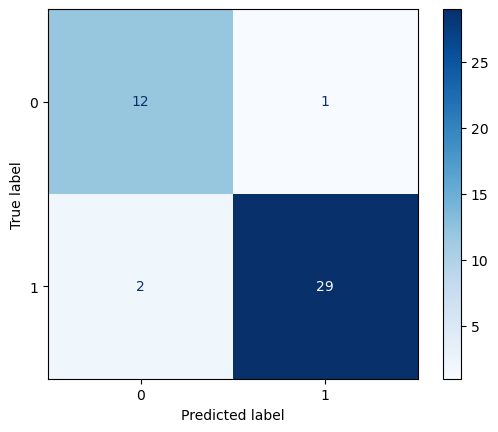

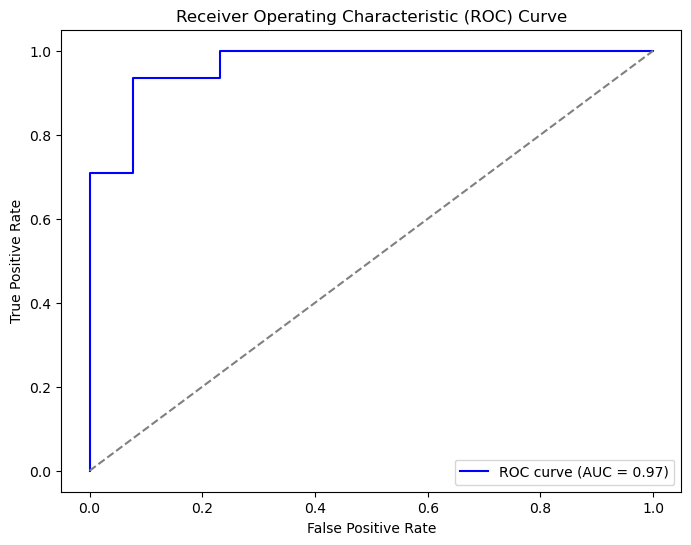


Training Fold 2...


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.9386 - loss: 0.2916 - val_accuracy: 1.0000 - val_loss: 0.0954
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.9478 - loss: 0.1785 - val_accuracy: 1.0000 - val_loss: 0.0338
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.9794 - loss: 0.1062 - val_accuracy: 0.9773 - val_loss: 0.0299
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.9726 - loss: 0.0917 - val_accuracy: 1.0000 - val_loss: 0.0268
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.9715 - loss: 0.0911 - val_accuracy: 1.0000 - val_loss: 0.0374
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 387ms/step


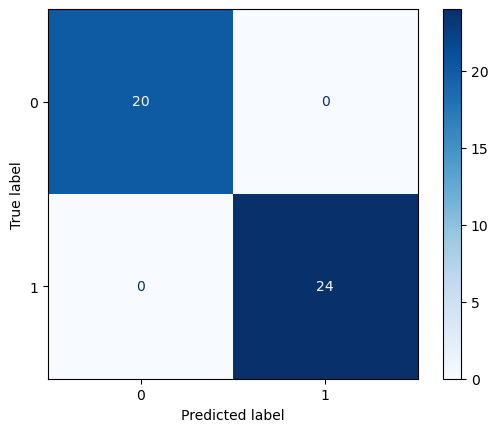

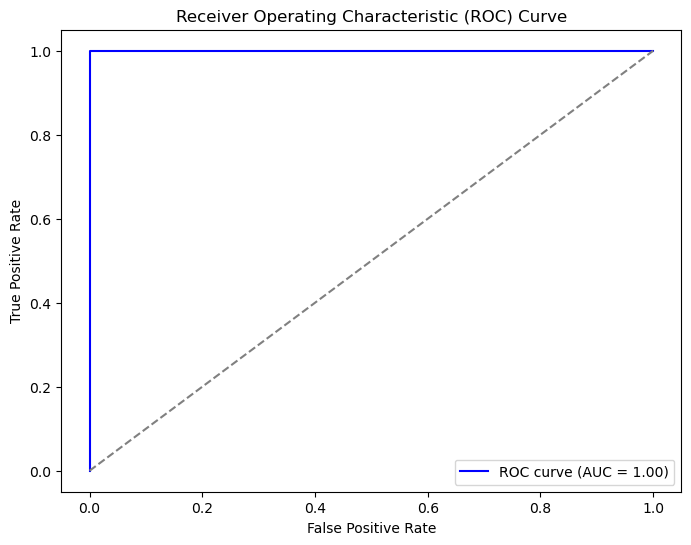


Training Fold 3...


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.9737 - loss: 0.0881 - val_accuracy: 1.0000 - val_loss: 0.0375
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.9491 - loss: 0.1238 - val_accuracy: 1.0000 - val_loss: 0.0222
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.9859 - loss: 0.0607 - val_accuracy: 1.0000 - val_loss: 0.0320
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.9467 - loss: 0.0815 - val_accuracy: 1.0000 - val_loss: 0.0253
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.9620 - loss: 0.1303 - val_accuracy: 0.9318 - val_loss: 0.1481
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 345ms/step


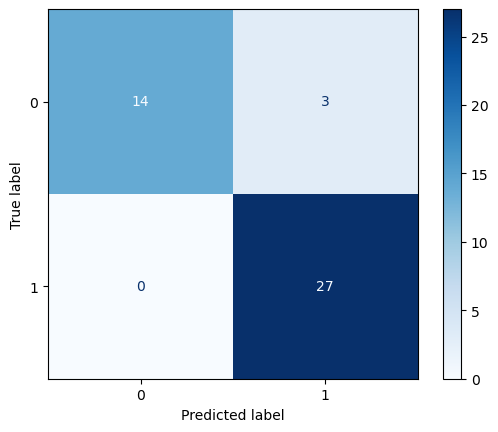

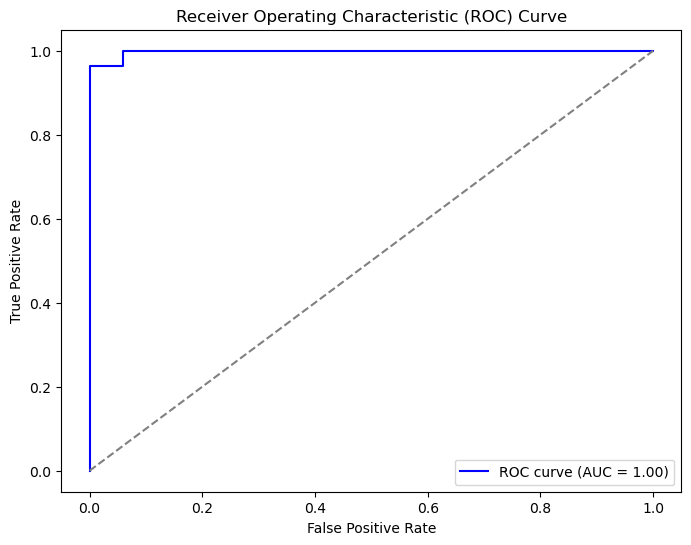


Training Fold 4...


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.9323 - loss: 0.1226 - val_accuracy: 0.9767 - val_loss: 0.0414
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.9809 - loss: 0.0580 - val_accuracy: 1.0000 - val_loss: 0.0223
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.9597 - loss: 0.0780 - val_accuracy: 1.0000 - val_loss: 0.0106
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.9675 - loss: 0.0678 - val_accuracy: 0.9767 - val_loss: 0.0321
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.9853 - loss: 0.0591 - val_accuracy: 0.9767 - val_loss: 0.0355
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 341ms/step


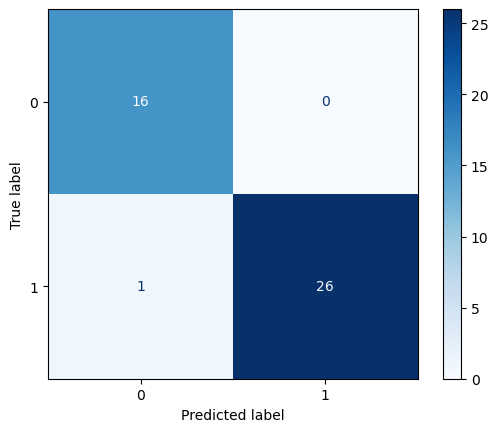

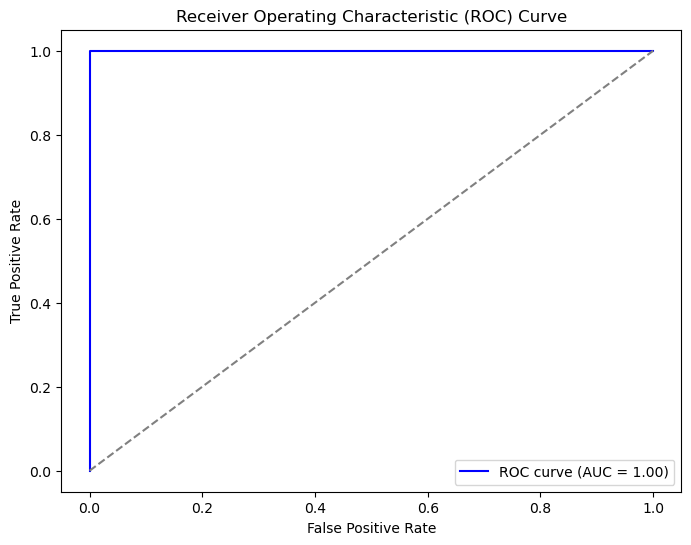


Training Fold 5...


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.9875 - loss: 0.0292 - val_accuracy: 0.9302 - val_loss: 0.1720
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.9767 - loss: 0.0548 - val_accuracy: 0.9767 - val_loss: 0.1420
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.9933 - loss: 0.0338 - val_accuracy: 0.9535 - val_loss: 0.1990
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.9828 - loss: 0.0327 - val_accuracy: 0.9535 - val_loss: 0.2013
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.9881 - loss: 0.0258 - val_accuracy: 0.9302 - val_loss: 0.2677
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step


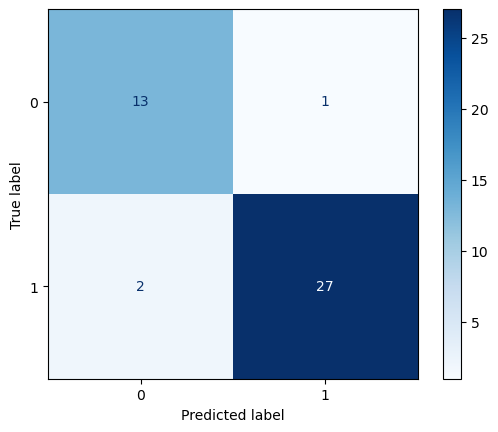

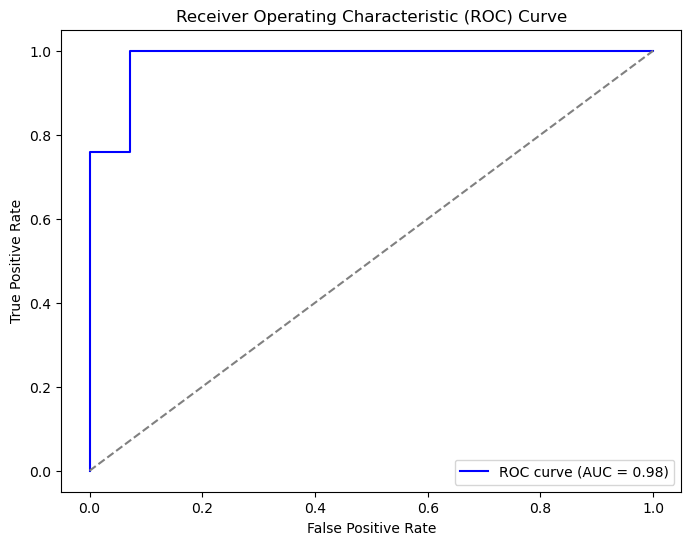

In [ ]:
# import required libraries
import time
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt


# Define 5-fold cross-validation
five_fold_validation = KFold(n_splits=5, shuffle=True, random_state=42)

# Store the metrics for each fold in a list
fold_no = 1
runtime_per_fold = []
precision_per_fold = []
recall_per_fold = []
f1_score_per_fold = []

# Iterate through folds
for train_idx, val_idx in five_fold_validation.split(images):
    print(f'\nTraining Fold {fold_no}...')

    # Data augmentation using image datagenerator
    datagenerator = ImageDataGenerator(
    rotation_range=2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

    # Split the data into the training and validation
    X_train, X_val = images[train_idx], images[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]


    # Fit the datagenerator only on training data
    datagenerator.fit(X_train)

    # Create generator from training data
    train_generator = datagenerator.flow(X_train, y_train, batch_size=32)

    start_time = time.time()

    # Train model on the training dataset
    history = transfer_learning_model.fit(train_generator, epochs= 5, batch_size=32, validation_data=(X_val, y_val))

    # calculate the runtime per fold of validation
    end_time = time.time()
    training_time = end_time - start_time
    runtime_per_fold.append(training_time)

    # make prediction using the transfer learning model
    transfer_learning_predictions = transfer_learning_model.predict(X_val)
    predictions = [1 if x >= 0.5 else 0 for x in transfer_learning_predictions]

    # perform performance evaluation for each fold of validation
    from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,roc_curve,auc,ConfusionMatrixDisplay
    tl_model_recall = round(recall_score(y_val,predictions),2)
    tl_model_f1_score = round(f1_score(y_val,predictions),2)
    tl_model_precision = round(precision_score(y_val,predictions),2)
    transfer_learning_confusion_matrix = confusion_matrix(y_val,predictions)

    # append the evaluation metrics to a list
    precision_per_fold.append(tl_model_precision)
    recall_per_fold.append(tl_model_recall)
    f1_score_per_fold.append(tl_model_precision)

    # Display Confusion Matrix
    display_cm = ConfusionMatrixDisplay(confusion_matrix=transfer_learning_confusion_matrix, display_labels=[0, 1])
    display_cm.plot(cmap='Blues')
    plt.show()

    # calculate Area under the ROC Curve
    false_positive_rate, true_positive_rate, _ = roc_curve(y_val, transfer_learning_predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(false_positive_rate, true_positive_rate, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    fold_no += 1

In [ ]:
transfer_learning_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,640,565 (67.29 MB)

 Trainable params: 5,859,985 (22.35 MB)

 Non-trainable params: 60,608 (236.75 KB)

 Optimizer params: 11,719,972 (44.71 MB)

In [ ]:
# record the average precision, recall, f1_score, runtime

avg_runtime = np.mean(runtime_per_fold)
avg_precision = np.mean(precision_per_fold)
avg_recall = np.mean(recall_per_fold)
avg_f1_score = np.mean(f1_score_per_fold)

In [ ]:
# print the results

print(f'the average precision for 5 fold validation is {avg_precision:.2f}')
print(f'the average runtime for 5 fold validation is {avg_runtime:.2f}')
print(f'the average recall for 5 fold validation is {avg_recall:.2f}')
print(f'the average f1_score for 5 fold validation is {avg_f1_score:.2f}')

the average precision for 5 fold validation is 0.97
the average runtime for 5 fold validation is 98.86
the average recall for 5 fold validation is 0.97
the average f1_score for 5 fold validation is 0.97


# Conclusion from Experiment 3
As we can observe that the EfficientNetV2B0 model was able classify the open and closed heart images nearly perfectly we can conclude that by looking at metrics of evaluation like precision(0.97),recall(0.97) and f1_score(0.97). The Area Under the ROC Curve also tells the same story the average Area under the ROC Curve was recorded to be 0.97 which is near perfect, also the model is pretty fast at computation with an average of 98.86 seconds per fold.



Using data augmentation we were able to prevent overfitting and generalise the model to the validation data which is observable in high validation accuracy per epoch.
So, to conclude, we were able to efficiently classify images with minimal run time using transfer learning and data augmentation even when we were working with a small dataset.

# Task 2:
**Chamber Segmentation**

# Chamber Segmentation on Heart Images
In computer vision, segmentation is the process of partitioning a digital image into multiple segments or regions to simplify and represent the image in a more understandable and analyzable manner.


 We are going to use heart images as our input and predict their repective masks then we will try to evaluate our results using actual masks images.

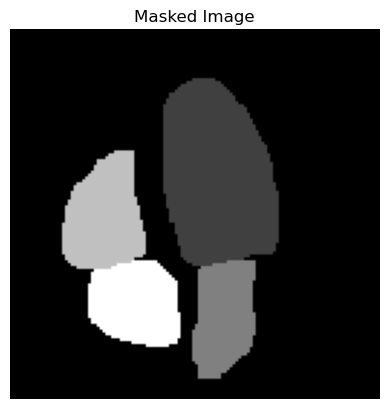

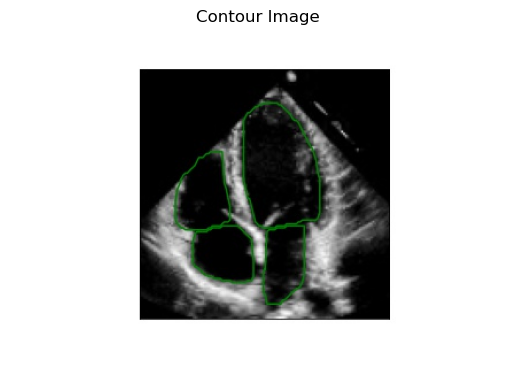

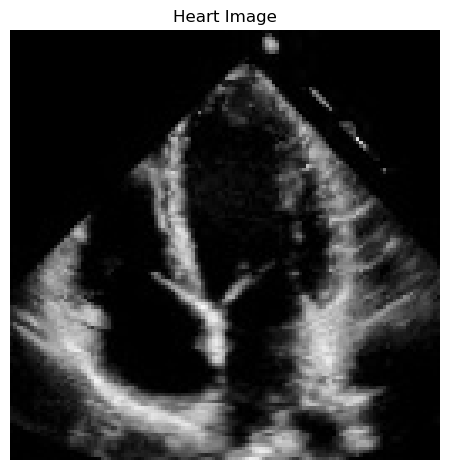

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load images
img_masked = cv2.imread(r'C:\advance_data_science_coursework\various\masks\1.tiff')
img_contour = cv2.imread(r'C:\advance_data_science_coursework\various\contours\1.jpg')
img_heart = cv2.imread(r'C:\advance_data_science_coursework\various\heart\1.jpg')
# Convert from BGR to RGB
img_masked_rgb = cv2.cvtColor(img_masked, cv2.COLOR_BGR2RGB)
img_contour_rgb = cv2.cvtColor(img_contour, cv2.COLOR_BGR2RGB)
img_heart_rgb = cv2.cvtColor(img_heart, cv2.COLOR_BGR2RGB)
# Plot masked image contour image and the original image
plt.figure()
plt.imshow(img_masked_rgb)
plt.title('Masked Image')
plt.axis('off')

plt.figure()
plt.imshow(img_contour_rgb)
plt.title('Contour Image')
plt.axis('off')
plt.figure()
plt.imshow(img_heart_rgb)
plt.title('Heart Image')
plt.axis('off')

plt.tight_layout()
plt.show()


# data preprocessing and Feature Engineering

In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

# Define paths to your image dataset and masks
image_dir = r'C:\advance_data_science_coursework\various\heart'
mask_dir = r'C:\advance_data_science_coursework\various\masks'

# List all image and mask filenames and record them in a list
image_files = sorted(os.listdir(image_dir))
mask_files = sorted(os.listdir(mask_dir))

In [ ]:
# Image parameters
img_height = 256
img_width = 256

# Preprocess images
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (img_width, img_height))  # Resize image
    image = image / 255.0  # Normalize
    return image

# Preprocess masks
def preprocess_mask(mask_path):
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, (img_width, img_height))  # Resize mask
    mask = mask / 255.0  # Normalize
    return mask

In [ ]:
# Load and preprocess images and masks
images = np.array([preprocess_image(os.path.join(image_dir, img)) for img in image_files])
masks = np.array([preprocess_mask(os.path.join(mask_dir, mask)) for mask in mask_files])

# Expand dimensions of images and masks to include channels
images = np.expand_dims(images, axis=-1)
masks = np.expand_dims(masks, axis=-1)

# Train Test Split

In [ ]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size=0.2, random_state=42)

# we need to make the training data compatible with the
X_train_rgb = np.repeat(X_train, 3, axis=-1)
X_test_rgb = np.repeat(X_test, 3, axis=-1)

In [ ]:
from tensorflow.keras.utils import to_categorical

# four classes for four chambers in heart
num_classes = 4

# perform one hot encoding
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)


# Model Selection and Training
We are gonna be working with U-Net model with MobileNetV2 as a backbone.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

def unet_mobilenetv2(input_shape=(256, 256, 3), num_classes=4):
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

    # Extract skip connections
    skip_connections = [
        base_model.get_layer("block_1_expand_relu").output,
        base_model.get_layer("block_3_expand_relu").output,
        base_model.get_layer("block_6_expand_relu").output,
        base_model.get_layer("block_13_expand_relu").output,
    ]
    encoder_output = base_model.get_layer("out_relu").output

    # Decoder
    x = encoder_output
    decoder_filters = [512, 256, 128, 64]

    for i in range(4):
        x = layers.Conv2DTranspose(decoder_filters[i], (3, 3), strides=(2, 2), padding="same")(x)
        x = layers.concatenate([x, skip_connections[3 - i]])
        x = layers.Conv2D(decoder_filters[i], (3, 3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)

    # Final upsample to match input size
    x = layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding="same")(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)

    # Output layer for multiclass segmentation
    outputs = layers.Conv2D(num_classes, (1, 1), activation='softmax')(x)

    model = models.Model(inputs=base_model.input, outputs=outputs)
    return model


In [ ]:
# build the model
model = unet_mobilenetv2(input_shape=(256, 256, 3), num_classes=4)
# compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.MeanIoU(num_classes=4)])


C:\Users\Dell\AppData\Local\Temp\ipykernel_8748\393873128.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')


In [ ]:
# fit the model with the training data set
history = model.fit(X_train_rgb, y_train_cat,batch_size=8,epochs=20)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 229s 6s/step - accuracy: 0.0829 - loss: 1.7208 - mean_io_u: 0.3750
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 140s 6s/step - accuracy: 0.4291 - loss: 1.2571 - mean_io_u: 0.3750
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 132s 6s/step - accuracy: 0.8969 - loss: 0.7885 - mean_io_u: 0.3750
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 151s 6s/step - accuracy: 0.9906 - loss: 0.3940 - mean_io_u: 0.3750
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 142s 6s/step - accuracy: 0.9967 - loss: 0.1874 - mean_io_u: 0.3750
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 137s 6s/step - accuracy: 0.9973 - loss: 0.0946 - mean_io_u: 0.3750
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 138s 6s/step - accuracy: 0.9975 - loss: 0.0560 - mean_io_u: 0.3750
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 131s 6s/step - accuracy: 0.9978 - loss: 0.0373 - mean_io_u: 0.3750
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 155s 7s/step - accuracy: 0.9980 - loss: 0.0273 - mean_io_u: 0.3750
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 206s 7s/step - a

In [ ]:
# evaluate the model on the test dataset
test_loss, test_acc, test_iou = model.evaluate(X_test_rgb, y_test_cat)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Mean IoU: {test_iou:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.9928 - loss: 0.0716 - mean_io_u: 0.3750
Test Loss: 0.0719
Test Accuracy: 0.9928
Test Mean IoU: 0.3750


In [ ]:
# Predicttions
predictions = model.predict(X_test_rgb)

# assign the class label with the highest probability for each image
preds_labels = np.argmax(predictions, axis=-1)
y_test_labels = np.argmax(y_test_cat, axis=-1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 6s/step


#  Visualtion
Lets plot the input data along with the actual masks(label) and the predicted output of the U-Net model.

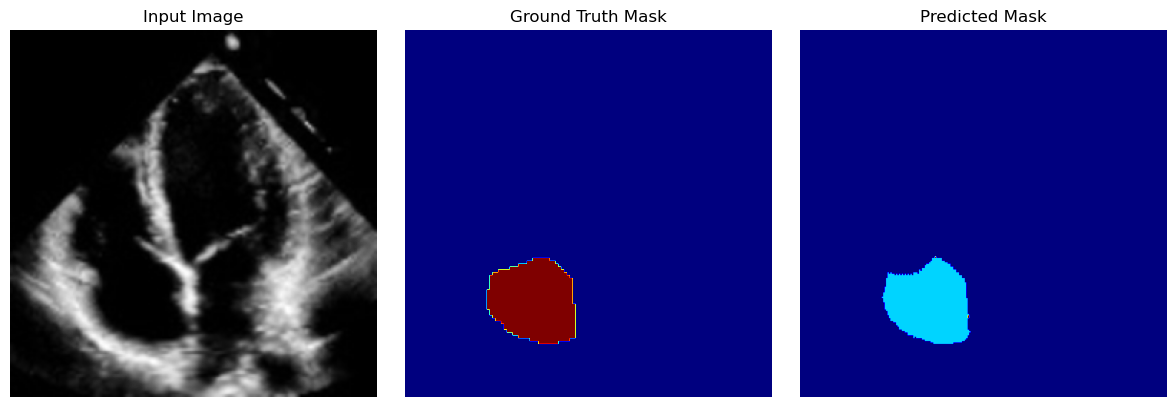

In [ ]:
import matplotlib.pyplot as plt

def display_prediction(index):
    plt.figure(figsize=(12, 4))

    # Original grayscale image (before RGB conversion)
    original = X_test[index, :, :, 0]

    # Ground truth mask
    mask = y_test_labels[index]

    # Predicted mask
    pred = preds_labels[index]

    titles = ['Input Image', 'Ground Truth Mask', 'Predicted Mask']
    images = [original, mask, pred]

    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.imshow(images[i], cmap='gray' if i == 0 else 'jet')
        plt.title(titles[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example: Display prediction for a sample test image
display_prediction(0)


# now lets see if we can work with combined input of the images and their corresponding contour plots.
In this experiment we would create a two channel input of heart images and their corresponding contour images.

In [ ]:
# upload contour images
contour_dir = r'C:\advance_data_science_coursework\various\heart'
contour_files = sorted(os.listdir(contour_dir))

def preprocess_contour(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (img_width, img_height))  # Resize image
    image = image / 255.0  # Normalize
    return image

# Load contours
contours = np.array([preprocess_contour(os.path.join(contour_dir, contour)) for contour in contour_files])

# Expand dimensions of images and masks to include channels
contours = np.expand_dims(contours, axis=-1)


In [ ]:
# building a segmentation mask from a dictionary of heart chamber contours.
def generate_mask_from_dict(mask_shape, chamber_dict):
    mask = np.zeros(mask_shape, dtype=np.uint8)  # (256, 256)
    # convert the
    class_map = {'LV': 1, 'RV': 2, 'LA': 3, 'RA': 4}
    for chamber_name, contour_coords in chamber_dict.items():
        class_id = class_map[chamber_name]
        contour = np.array(contour_coords, dtype=np.int32)
        cv2.fillPoly(mask, [contour], class_id)

    return mask


# train test split

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Step 1: Images + Contour
combined_input = np.concatenate([images, contours], axis=-1)

# Step 2: Train Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    combined_input, masks, test_size=0.2, random_state=42
)

# Step 3: One-hot encode labels
num_classes = 4
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)


# Model Training
We definitely need to make some tweaks to the model to use it with two input channels

In [ ]:
from tensorflow.keras import layers, models

def simple_unet(input_shape=(256, 256, 2), num_classes=4):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    c1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(p1)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p2)

    # Decoder
    u1 = layers.UpSampling2D((2, 2))(c3)
    concat1 = layers.Concatenate()([u1, c2])
    c4 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(concat1)

    u2 = layers.UpSampling2D((2, 2))(c4)
    concat2 = layers.Concatenate()([u2, c1])
    c5 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(concat2)

    outputs = layers.Conv2D(num_classes, (1, 1), activation='softmax')(c5)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model


In [ ]:
# build the model
model_2 = simple_unet(input_shape=(256, 256, 2), num_classes=4)
# compile the model
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training dataset
model_2.fit(X_train, y_train_cat, batch_size=8, epochs=10)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 840ms/step - accuracy: 0.7476 - loss: 1.0459
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 837ms/step - accuracy: 0.9535 - loss: 0.2797
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 854ms/step - accuracy: 0.9531 - loss: 0.1981
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 856ms/step - accuracy: 0.9540 - loss: 0.1868
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 856ms/step - accuracy: 0.9537 - loss: 0.1824
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 843ms/step - accuracy: 0.9543 - loss: 0.1746
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 823ms/step - accuracy: 0.9542 - loss: 0.1661
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 829ms/step - accuracy: 0.9532 - loss: 0.1607
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 838ms/step - accuracy: 0.9534 - loss: 0.1535
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 836ms/step - accuracy: 0.9532 - loss: 0.1454


In [ ]:
# evaluate the performance of the model on the test dataset
model_2.evaluate(X_test, y_test_cat)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 627ms/step - accuracy: 0.9526 - loss: 0.1420


[0.14034907519817352, 0.953216552734375]

In [ ]:
# make predictions of the model
predictions = model_2.predict(X_test)
preds_labels = np.argmax(preds, axis=-1)  # shape: (44, 256, 256)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 401ms/step


# Visualtion
Lets plot the input data along with the actual masks(label) and the predicted output of the U-Net model.

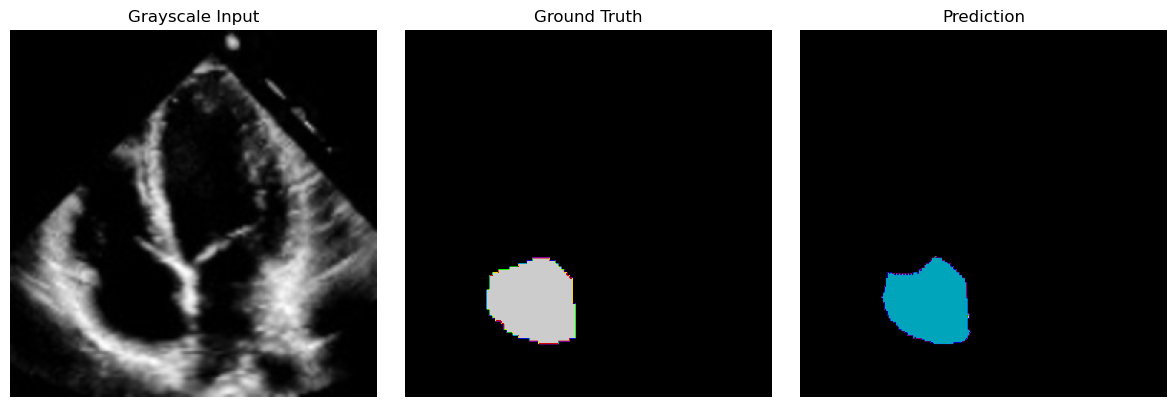

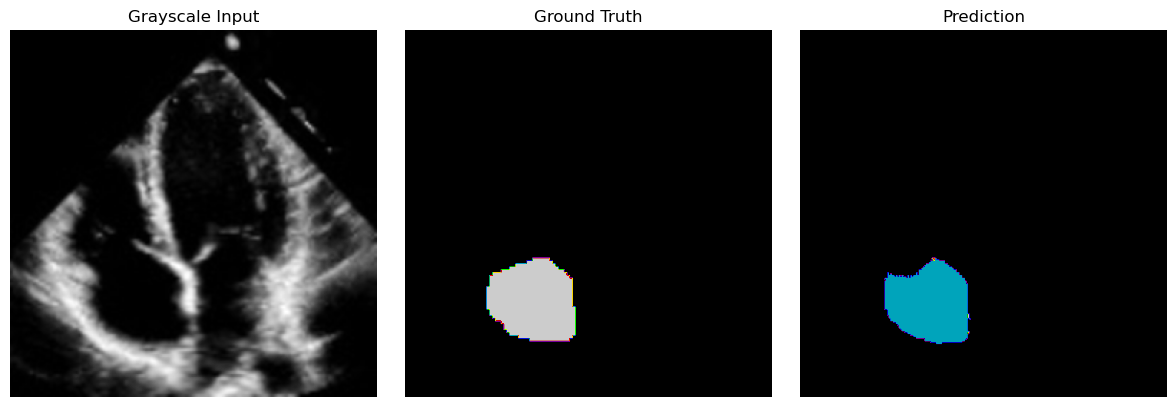

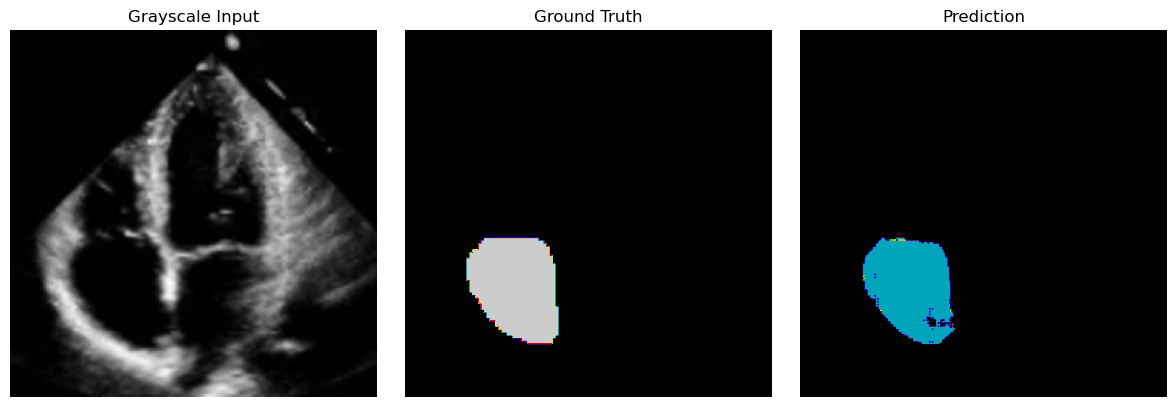

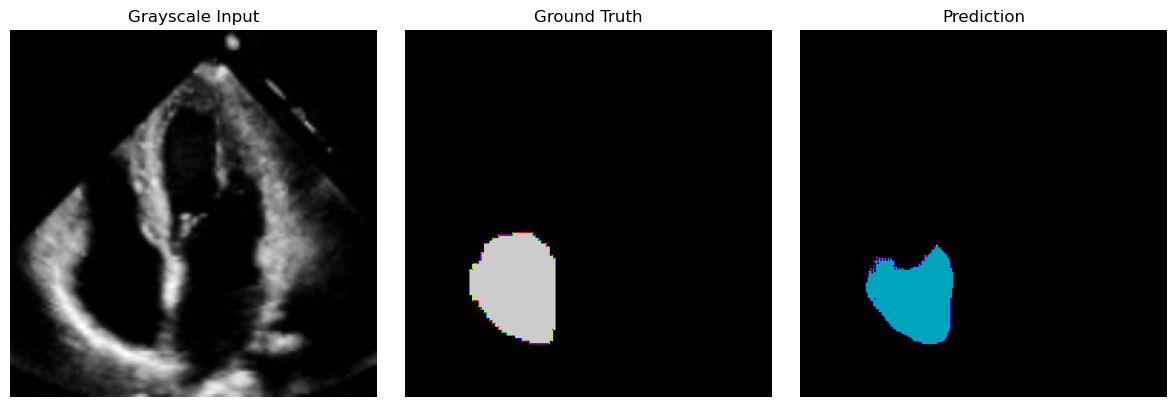

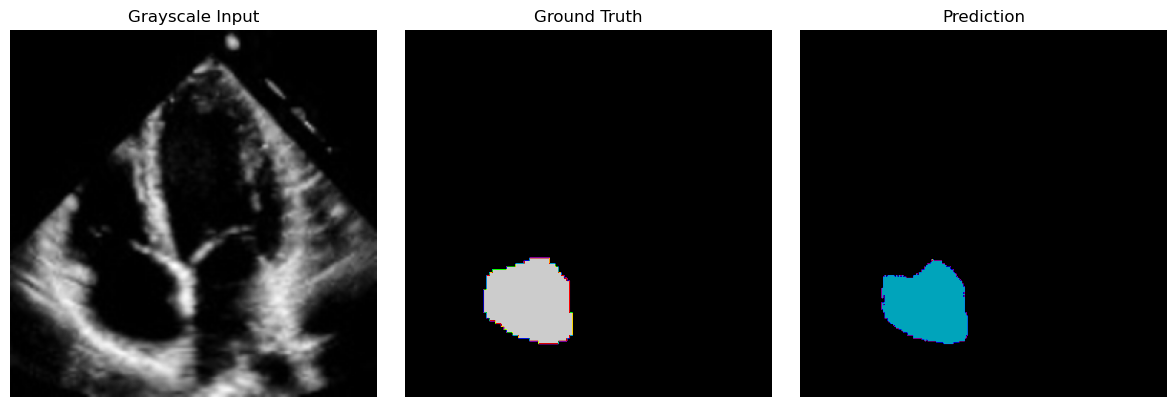

In [ ]:
import matplotlib.pyplot as plt

def display_sample(index):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    # Show grayscale + contour (channel 0 and 1)
    image = X_test[index]
    grayscale = image[:, :, 0]
    contour = image[:, :, 1]

    axes[0].imshow(grayscale, cmap='gray')
    axes[0].set_title("Grayscale Input")

    axes[1].imshow(np.argmax(y_test_cat[index], axis=-1), cmap='nipy_spectral')
    axes[1].set_title("Ground Truth")

    axes[2].imshow(preds_labels[index], cmap='nipy_spectral')
    axes[2].set_title("Prediction")

    for ax in axes:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Show first 5 predictions
for i in range(5):
    display_sample(i)
